In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
BP = df["BP"].replace( {"HIGH": "BP_HIGH", "NORMAL": "BP_NORMAL", "LOW": "BP_LOW"} )
df = df.drop("BP", axis=1).join( BP )

In [5]:
Cholesterol = df["Cholesterol"].replace( {"HIGH": "Cholesterol_HIGH", "NORMAL": "Cholesterol_NORMAL"} )
df = df.drop("Cholesterol", axis=1).join( Cholesterol )

In [6]:
Drug = df["Drug"].replace( {"DrugY": "drugY"} )
df = df.drop("Drug", axis=1).join( Drug )

In [7]:
for col in ["Sex", "BP", "Cholesterol"]:
    df = df.join( pd.get_dummies(df[col]) ).drop(col, axis=1)

<Axes: >

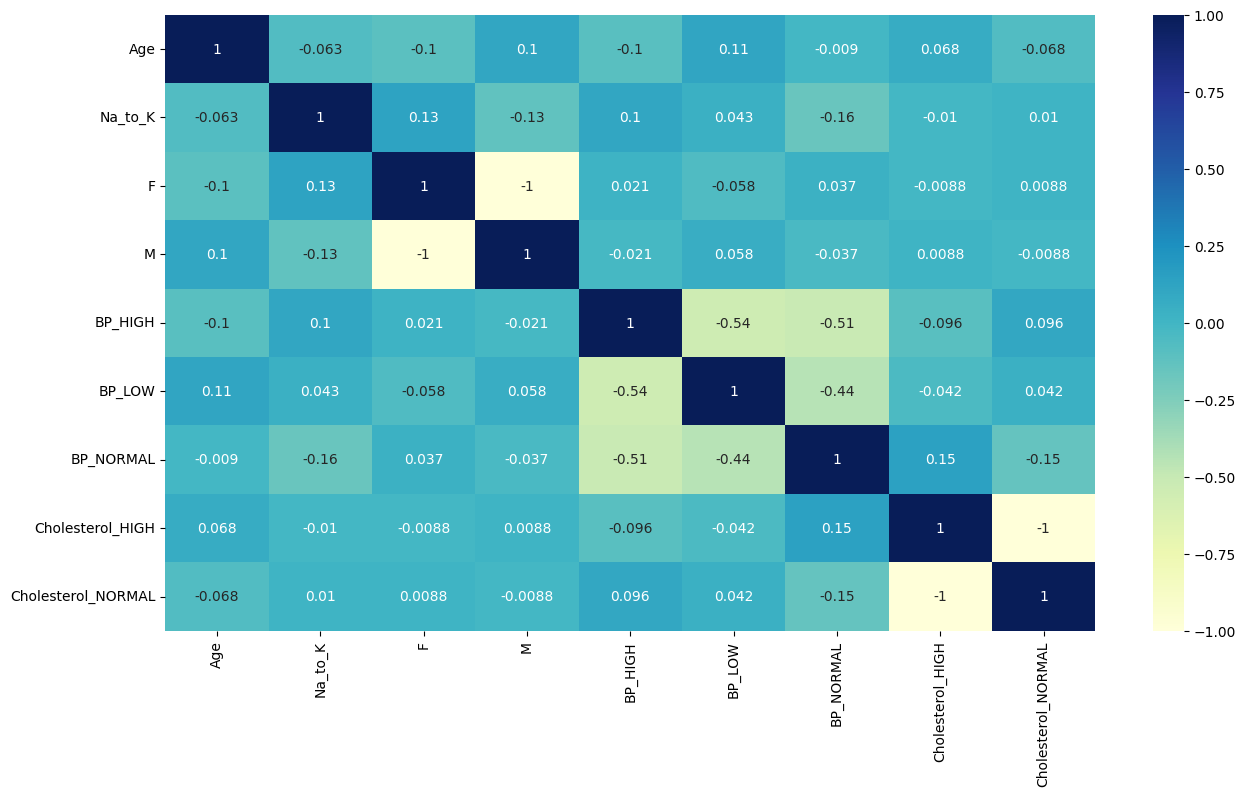

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap( df.drop("Drug", axis=1).corr(), cmap="YlGnBu", annot=True )
# sns.heatmap( df.corr(), cmap="YlGnBu", annot=True )

In [9]:
Drug = df["Drug"].replace( {"drugA": 0, "drugB": 1, "drugC": 2, "drugX": 3, "drugY": 4} )
df = df.drop("Drug", axis=1).join( Drug )

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop( "Drug", axis=1 )

scaler.fit(X)

X_s = scaler.transform(X)

In [11]:
from sklearn.model_selection import train_test_split

y = df["Drug"]

X_train_s, X_test_s, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=1337)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=4)

In [13]:
knn.score(X_test_s, y_test)

0.8

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="random", n_init=100)

kmeans.fit(X_train_s)

KMeans(init='random', n_clusters=5, n_init=100)

In [23]:
from sklearn.metrics import adjusted_rand_score

# adjusted_rand_score(y_train, kmeans.predict(X_train_s))
print(y_train, "\n",  kmeans.predict(X_train_s))

184    4
141    4
113    3
179    4
52     4
      ..
196    2
167    3
92     4
189    4
151    1
Name: Drug, Length: 160, dtype: int64 
 [2 0 0 3 1 0 0 0 4 1 3 0 2 1 3 2 3 2 1 1 4 0 2 0 4 0 1 1 2 0 2 4 4 2 2 2 0
 0 0 0 0 0 2 1 2 1 2 3 1 1 3 1 1 3 3 0 0 2 1 1 4 3 0 0 4 3 2 1 0 1 1 3 4 0
 0 4 3 4 4 3 0 1 3 4 1 1 2 1 1 0 0 4 4 1 2 0 4 2 0 3 2 0 3 1 1 1 1 4 2 3 0
 1 2 4 3 2 4 1 3 1 2 2 3 3 3 1 2 3 0 2 1 0 3 0 0 0 1 1 4 1 3 0 0 3 1 4 2 0
 2 1 3 4 4 0 3 4 3 2 1 2]


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

param_grid = {
    "eps": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.005, 0.01],
    "min_samples": [1, 2, 5, 10, 15]
}

clf = GridSearchCV( DBSCAN(), param_grid, cv=5, scoring="accuracy")

In [17]:
clf.fit(X_train_s)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    sco

GridSearchCV(cv=5, estimator=DBSCAN(),
             param_grid={'eps': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.005,
                                 0.01],
                         'min_samples': [1, 2, 5, 10, 15]},
             scoring='accuracy')

In [18]:
best_clf = clf.best_estimator_

In [19]:
dbscan = DBSCAN( eps=clf.best_params_["eps"], min_samples=clf.best_params_["min_samples"] )

In [20]:
dbscan.fit(X_train_s)

DBSCAN(eps=0.0001, min_samples=1)

In [22]:
clf.best_score_

nan

In [34]:
from sklearn.ensemble import RandomForestClassifier

rtc = RandomForestClassifier(n_estimators=100, random_state=1337)

rtc.fit(X_train_s, y_train)

RandomForestClassifier(random_state=1330)

In [35]:
rtc.score(X_train_s, y_train)

1.0

In [33]:
rtc.score(X_test_s, y_test)

1.0